In [2]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [3]:
#get the dataset
data = pd.read_csv('../_data/Actresses_1670-1700.csv')
data

,Actress,Year,Play,Dramatist,Role,Type,Generic markers
0,Elizabeth Barry,1675.0,Alcibiades,Thomas Otway,Draxilla,maid,NaN
1,Elizabeth Barry,1676.0,Abdelazar,Aphra Behn,Leonora,young girl,NaN
2,Elizabeth Barry,1676.0,The Wrangling Lovers,Edward Ravenscroft,Elvira,young girl,NaN
3,Elizabeth Barry,1676.0,Tom Essence,Thomas Rawlins,Theodocia,young girl,NaN
4,Elizabeth Barry,1676.0,Madam Fickle,Thomas Durfey,Constantiana,young girl,NaN
...,...,...,...,...,...,...,...
497,Nell Gwyn,1668.0,The Mulberry Garden,Charles Sedley,Olivia,young girl,NaN
498,Nell Gwyn,1668.0,An Evening's Love,John Dryden,Donna Jacintha,young girl,NaN
499,Nell Gwyn,1668.0,The Damoiselles a la Mode,Richard Flecknoe,Lysette,maid,NaN
500,Nell Gwyn,1669.0,Tyrannick Love,John Dryden,Valeria,young girl,NaN


In [4]:
# get a lis of the unique plays
plays = data['Play'].unique()

# get a list of each unique actress
actresses = data['Actress'].unique()

# create a df that contins the number of connections between each two actresses
connections = pd.DataFrame(index=actresses, columns=actresses)

# for each play, get a list of the names of the actresses that has played in them 
for play in plays:
    actresses = data[data['Play'] == play]['Actress'].unique()
    # for each pair of actresses, add 1 to the number of connections between them
    for i in range(len(actresses)):
        for j in range(i + 1, len(actresses)):
            if pd.isna(connections.loc[actresses[i], actresses[j]]):
                connections.loc[actresses[i], actresses[j]] = 1
            else:
                connections.loc[actresses[i], actresses[j]] += 1
            if pd.isna(connections.loc[actresses[j], actresses[i]]):
                connections.loc[actresses[j], actresses[i]] = 1
            else:
                connections.loc[actresses[j], actresses[i]] += 1
#set the lower triangle of the connections matrix to 0
for i in range(len(connections)):
    for j in range(i):
        connections.iloc[i, j] = 0
connections

,Elizabeth Barry,Mary Betterton,Jane Rogers,Susannah Mountfort,Rebecca Marshall,Jane Long,Frances Maria Knight,Mary Lee,Mary (‘Moll’) Davis,Elizabeth Currer,Charlotte Butler,Anne Bracegirdle,Elizabeth Boutell,Nell Gwyn
Elizabeth Barry,NaN,13,1,10,1,NaN,5,11,NaN,7,5,27,3,NaN
Mary Betterton,0,NaN,1,2,NaN,11,2,19,4,6,1,3,NaN,NaN
Jane Rogers,0,0,NaN,15,NaN,NaN,16,1,NaN,1,NaN,4,NaN,NaN
Susannah Mountfort,0,0,0,NaN,NaN,NaN,24,3,NaN,4,6,9,2,NaN
Rebecca Marshall,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5
Jane Long,0,0,0,0,0,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN
Frances Maria Knight,0,0,0,0,0,0,NaN,2,NaN,2,3,8,1,NaN
Mary Lee,0,0,0,0,0,0,0,NaN,NaN,7,2,NaN,NaN,NaN
Mary (‘Moll’) Davis,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
Elizabeth Currer,0,0,0,0,0,0,0,0,0,NaN,3,1,NaN,NaN


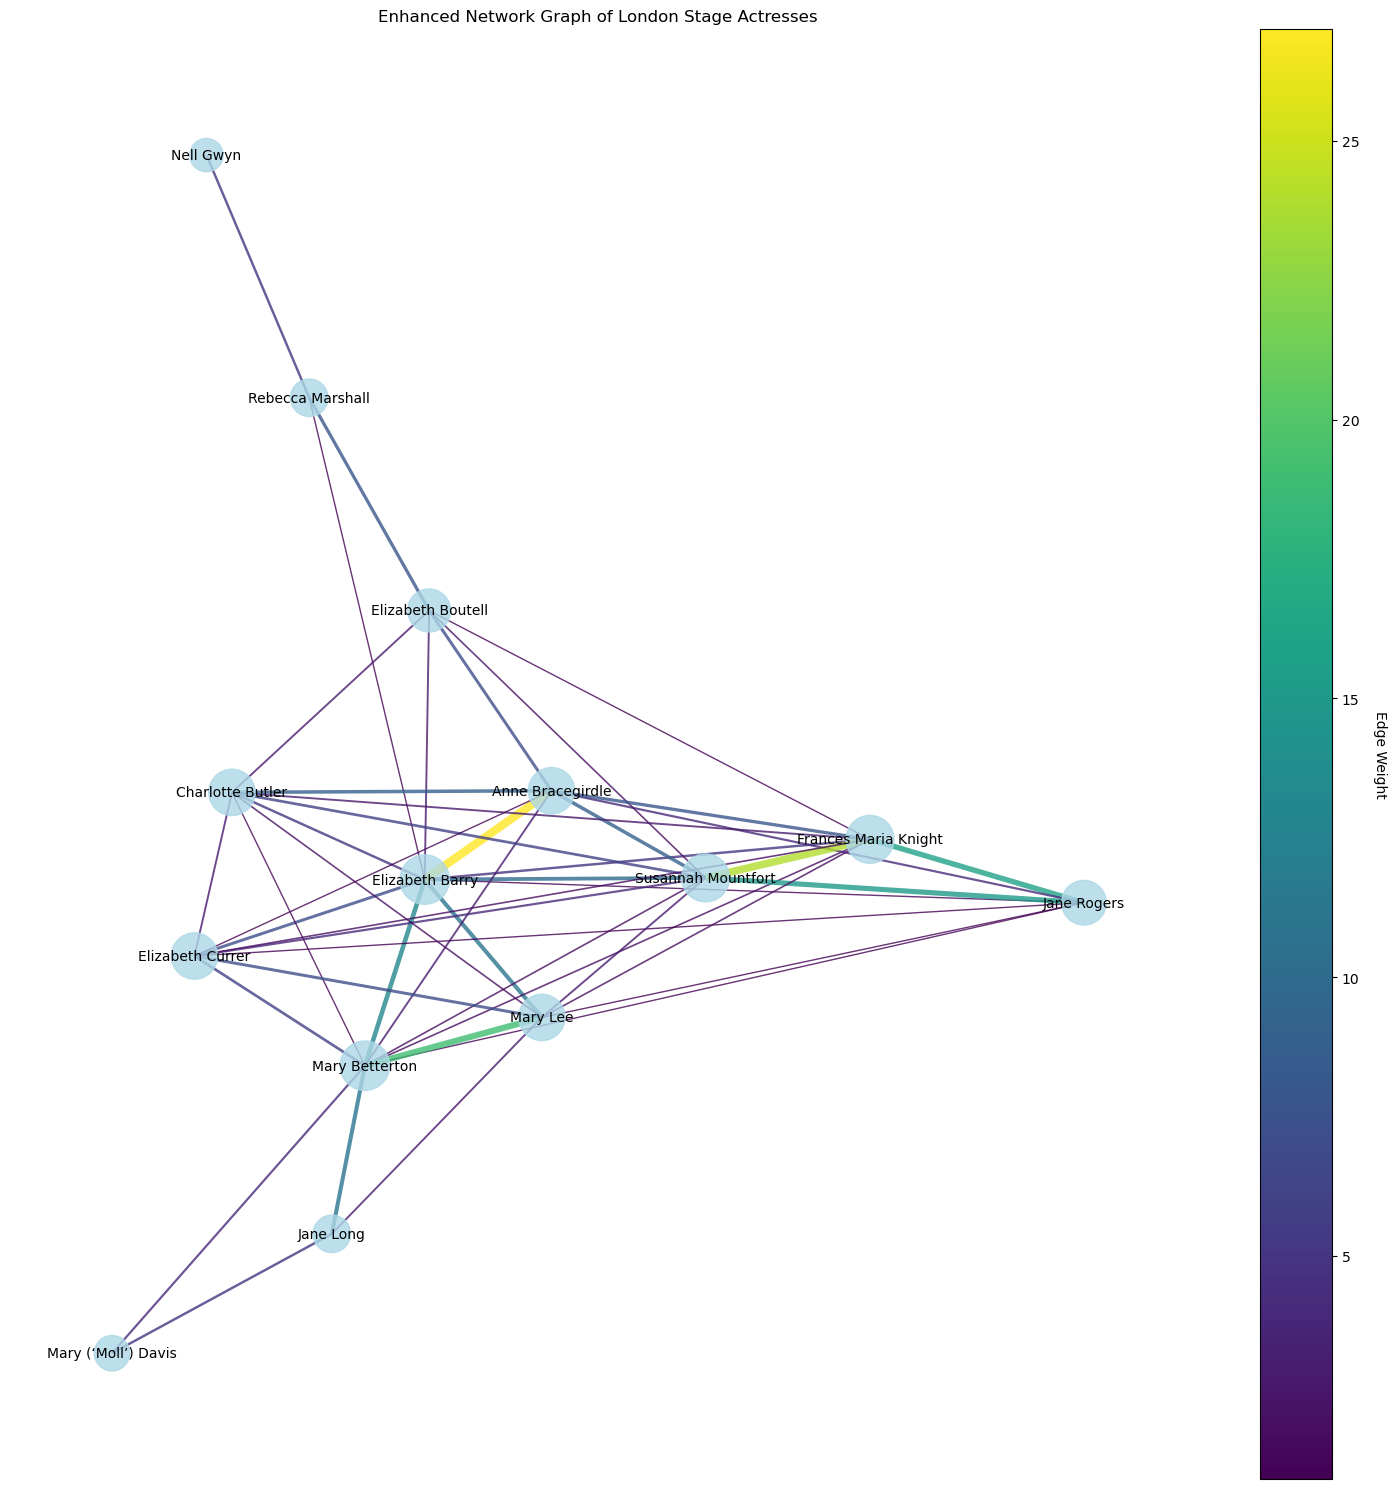

In [40]:
G = nx.Graph()

# Add nodes and edges with weights
for actress in connections.index:
    G.add_node(actress)

for i in range(len(connections.index)):
    for j in range(i + 1, len(connections.index)):
        weight = connections.iloc[i, j]
        if weight > 0:
            G.add_edge(connections.index[i], connections.index[j], weight=weight)

# Graph aesthetics
weights = [G[u][v]['weight'] for u, v in G.edges()]
norm = plt.Normalize(min(weights), max(weights))
cmap = plt.cm.viridis
edge_colors = [cmap(norm(w)) for w in weights]
scaled_weights = [1 + 5 * (w - min(weights)) / (max(weights) - min(weights)) for w in weights]
node_sizes = [500 + 1000 * nx.degree_centrality(G)[n] for n in G.nodes()]

# Layout
pos = nx.spring_layout(G, k=1.2, iterations=500)

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_colors, width=scaled_weights, alpha=0.8)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_family='sans-serif')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Edge Weight', rotation=270, labelpad=20)
cbar.ax.set_facecolor('none')

ax.set_title('Enhanced Network Graph of London Stage Actresses')
plt.axis('off')
plt.tight_layout()
plt.show()
